# Convert a portrait image into a line drawing
Let us import the necessary libraries first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Image pre-processing step

### Noise Reduction
One way to get rid of the noise on the image, is by applying Gaussian blur to smooth it.

So, let us implement a Gaussian kernel in order to apply it to our image.

$$ g(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}
$$

In [2]:
def gaussian_kernel(k_size, sigma=1):
    # divide the size, so kernel will have the symmetry in size
    k_size = int(k_size)//2
    # generate the rectangular meshgrid for the gaussian kernel
    x, mu = np.mgrid[-k_size:k_size+1, -k_size:k_size+1]
    # normalized factor
    normal_factor = 1/(2.*np.pi*sigma**2)
    kernel = normal_factor * np.exp(-((x**2 + mu**2)/(2.0*sigma**2)))
    return kernel

### Convolvution
To produce the new filtered image given the image convolving with the given kernel

In [3]:
def convolve(image, kernel):
    new_image = np.zeros(image.shape)
    for x in range(len(image)):
        for y in range(len(image[0])):
            for i in range(len(kernel)):
                for j in range(len(kernel[0])):
                    if x-i >=0 and x-i < len(image) and y-j >=0 and y-j < len(image[0]):
                        new_image[x, y] += image[x-i, y-j] * kernel[i, j]

    return new_image

Now, let's create a noise reduction function by convolving above function with the image

In [4]:
def noise_reduce(image,sigma=40):
    # convert the type to floating-point type
    new_image = image.astype(np.float).copy()
    # if the image has three or more dimensions
    # we will reduce to two dimensions with a normalized factor
    if len(new_image.shape) > 2:
        _,_, dim = new_image.shape
        if dim > 1:
            gray_image = 0.2126 * new_image[:,:,0] + 0.7152 * new_image[:,:,1] + 0.0722 * new_image[:,:,2]
    else: gray_image = new_image
    # create a Gaussian kernal size of 5
    kernel = gaussian_kernel(5,sigma)
    # Convolve the image with gaussian kernel
    convolved_image = convolve(gray_image, kernel)
    return convolved_image

In [5]:
def plot_two_images(image1, image2, title1=None, title2=None, size=(16,8)):
    f = plt.figure(figsize=size)
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.imshow(image1, cmap='gray')
    ax1.set_xticks([]),ax1.set_yticks([])
    ax1.set_title(title1,color='white')
    ax2.imshow(image2, cmap='gray')
    ax2.set_xticks([]),ax2.set_yticks([])
    ax2.set_title(title2,color='white')

Let's try our noise reduction function

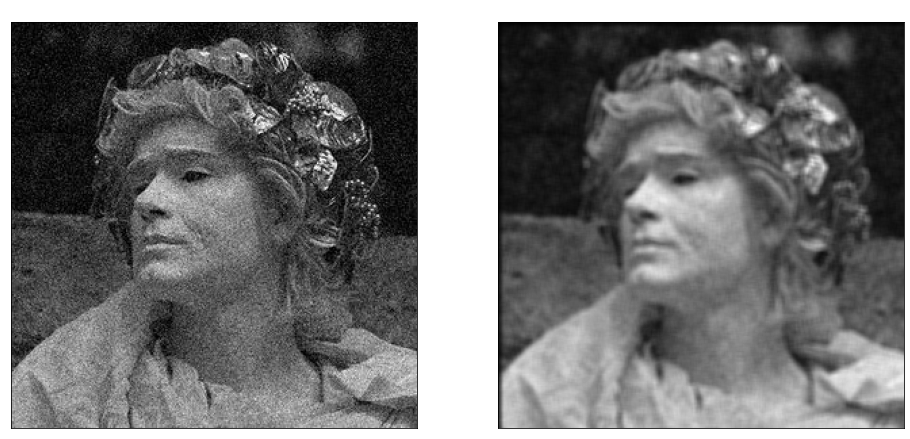

In [6]:
image = mpimg.imread('images/sample.jpg')
gray_image = image[:,:,0]
reduced_noise_image = noise_reduce(gray_image)
plot_two_images(gray_image,reduced_noise_image,'Noise Image','Reduced Noise Image')


Sharpen filter
$$
	\begin{bmatrix} 
	0 & -1 & 0 \\
	-1 & 5 & -1\\
	0 & -1 & 0 \\
	\end{bmatrix}
	\quad
	$$

In [7]:
def sharpen(image):
    new_image = image.copy()
    sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype = np.float)
    return convolve(new_image, sharpen)

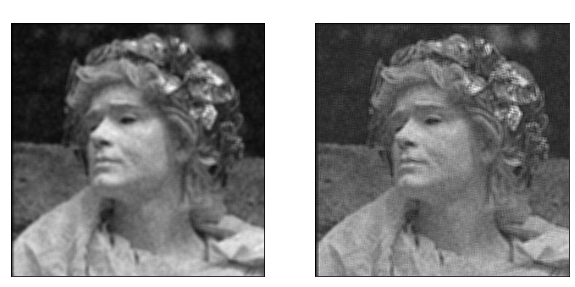

In [8]:
sharpened_image = sharpen(reduced_noise_image)
plot_two_images(reduced_noise_image,sharpened_image,'Reduced Noise Image','Sharpened Image',(10,5))

### Sobel Operator

Now, we would like to detect the edges from the image. Sobel Operator is one of the algorithms for the edge detection. It uses an isotropic or symmetric gradient operator or matrix to approximate the gradient intensity of the image to detect the edge

And to do so, we will convolve this kernel with the image in both horizontal and vertical directions

Sobel gradient matrix size of 3

 $ k_h = 
	\begin{bmatrix} 
	-1 & 0 & 1 \\
	-2 & 0 & 2\\
	-1 & 0 & 1 \\
	\end{bmatrix}
	\quad
	k_v = 
	\begin{bmatrix} 
	1 & 2 & 1 \\
	0 & 0 & 0\\
	-1 & -2 & -1 \\
	\end{bmatrix}
	\quad
	$

Sobel gradient matrix size of 5

 $ k_h = 
	\begin{bmatrix} 
	-1 & -2 & 0 & 2 & 1\\
	-4 & -8 & 0 & 8 & 4\\
	-6 & -12 & 0 & 12 & 6 \\
	-4 & -8 & 0 & 8 & 4 \\
	-1 & -2 & 0 & 2 & 1 \\
	\end{bmatrix}
	\quad
	k_v = 
	\begin{bmatrix} 
	1 & 4 & 6 & 4 & 1\\
	2 & 8 & 12 & 8 & 2\\
	0 & 0 & 0 & 0 & 0 \\
	-2 & -8 & -12 & -8 & -4 \\
	-1 & -4 & -6 & -4 & -1 \\
	\end{bmatrix}
	\quad
	$
	


In [10]:
def sobel_filter(image, k_size=5):

    new_image = image.astype(np.float).copy()
    
    # if the image has three or more dimensions
    # we will reduce to two dimensions with a normalized factor
    if len(new_image.shape) > 2:
        _,_, dim = new_image.shape
        if dim > 1:
            gray_image = 0.2126 * new_image[:,:,0] + 0.7152 * new_image[:,:,1] + 0.0722 * new_image[:,:,2]
    else: gray_image = new_image

    # gradient matrix
    if k_size == 3:
        Kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        Kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        Kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        Kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)

    Gx = convolve(gray_image, Kh)
    Gy = convolve(gray_image, Kv)
    # normalize both matrices
    convolved_image = np.sqrt(Gx * Gx + Gy * Gy)
    convolved_image *= 255.0 / np.max(convolved_image)     

    return convolved_image

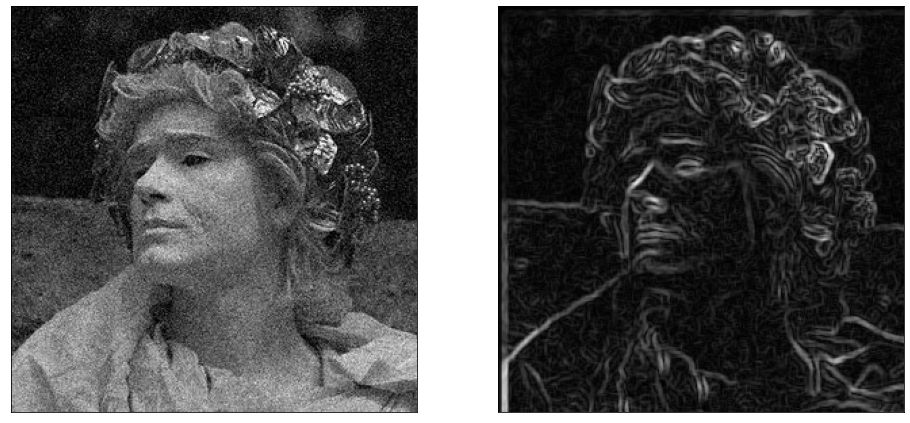

In [11]:
sobeled = np.absolute(sobel_filter(sharpened_image))
plot_two_images(gray_image,sobeled,size=(16,8))

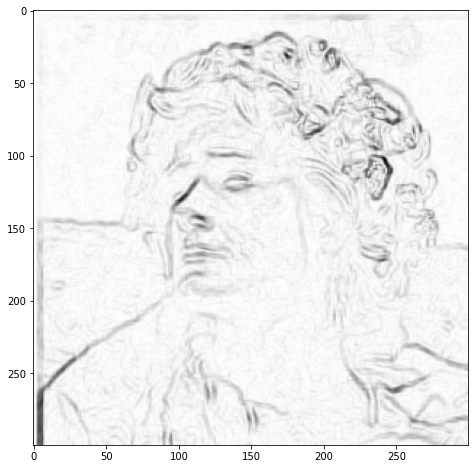

In [18]:
plt.figure(figsize=(16,8))
plt.imshow(sobeled, cmap='Greys')

Threshold